# Matplotlib

The module that we typically use to make plots in Python is called `matplotlib`. It is extremely powerful, and the [examples page](https://matplotlib.org/stable/gallery/index.html) on its website contains many useful plots which you might want to adapt for your own purposes. It is not feasible to memorise all of the options available for plotting; you should expect to reference this notebook and the `matplotlib` documentation/examples regularly. 

You can import `matplotlib` like so:

In [1]:
import matplotlib.pyplot as plt

We also need to tell `matplotlib` how to display plots. The easiest option is the following, which tells `matplotlib` to show plots directly after the cell they are created in.

In [2]:
%matplotlib inline

# Basic 2D plots

For the first example, we will plot $\sin$ on the interval $[-\pi, \frac{3\pi}{2}]$. The most convenient way of doing this involves `numpy`. We will first generate a sequence of $x$-coordinates and corresponding $y$-coordinates.

In [3]:
import numpy as np

x = np.arange(-np.pi, 3/2*np.pi, 0.01)   # x is an array of x-coords
y = np.sin(x)                            # y is a corresponding array of y-coords

Now that we have these coordinates, it is very simple to plot the function: just call `plt.plot`.

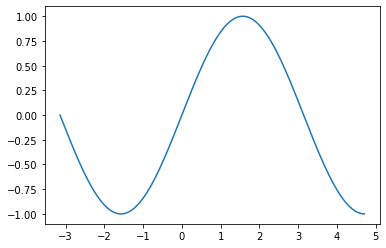

In [4]:
# The semicolon just suppresses a line of text above the plot.
# Try removing it to see the difference.
plt.plot(x, y);

We often want to draw multiple lines on the same plot. As an example, we will plot `sin` against the first few terms of its MacLaurin expansion, $\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - O(x^7)$. To do so, we create a `figure`, which is like a blank canvas, and then plot the lines one by one.

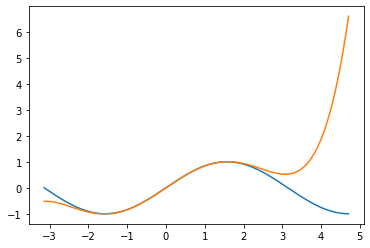

In [5]:
# the argument to figure should be a unique identifier - it can be a number or a string
fig = plt.figure("sin-vs-series")

# Get the y-coords for the MacLaurin series.
y2 = x - x**3/6 + x**5/120

# We can't draw directly onto figures - we need to draw onto a "subplot" of the figure.
# The next line means "add a 1x1 grid of plots to the canvas, and give us the first plot"
ax = fig.add_subplot(1, 1, 1)

# Now we can plot onto ax
ax.plot(x, y)
ax.plot(x, y2);

# Note: we could have instead done ax.plot(x, y, x, y2).

We should also add labels, a legend, and so on:

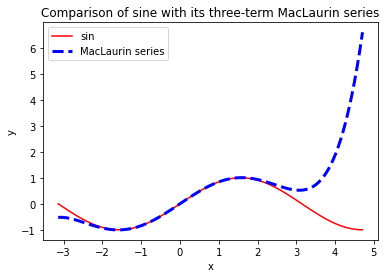

In [6]:
# A quicker way to produce figure and axes
fig, ax = plt.subplots()

# plot sin in red
ax.plot(x, y, color="red", label="sin")

# plot the series as a thick dashed blue line
ax.plot(x, y2, color="b", linestyle='--', linewidth=3, label="MacLaurin series")

# add labels to the axes
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a legend - the labels are provided in the ax.plot commands above
ax.legend()

# add a title
ax.set_title("Comparison of sine with its three-term MacLaurin series");

The plots you create with `matplotlib` are extremely customisable, and if you want to alter something about them you probably can - it's just a matter of finding the right search terms to get the solution.

# 3D surface plots

We can create 3-dimensional plots in a similar way to 2D plots. We need arrays of the $x$- and $y$-coordinates (the "grid" we are using), and also an array for the $z$ coordinates.

<IPython.core.display.Javascript object>


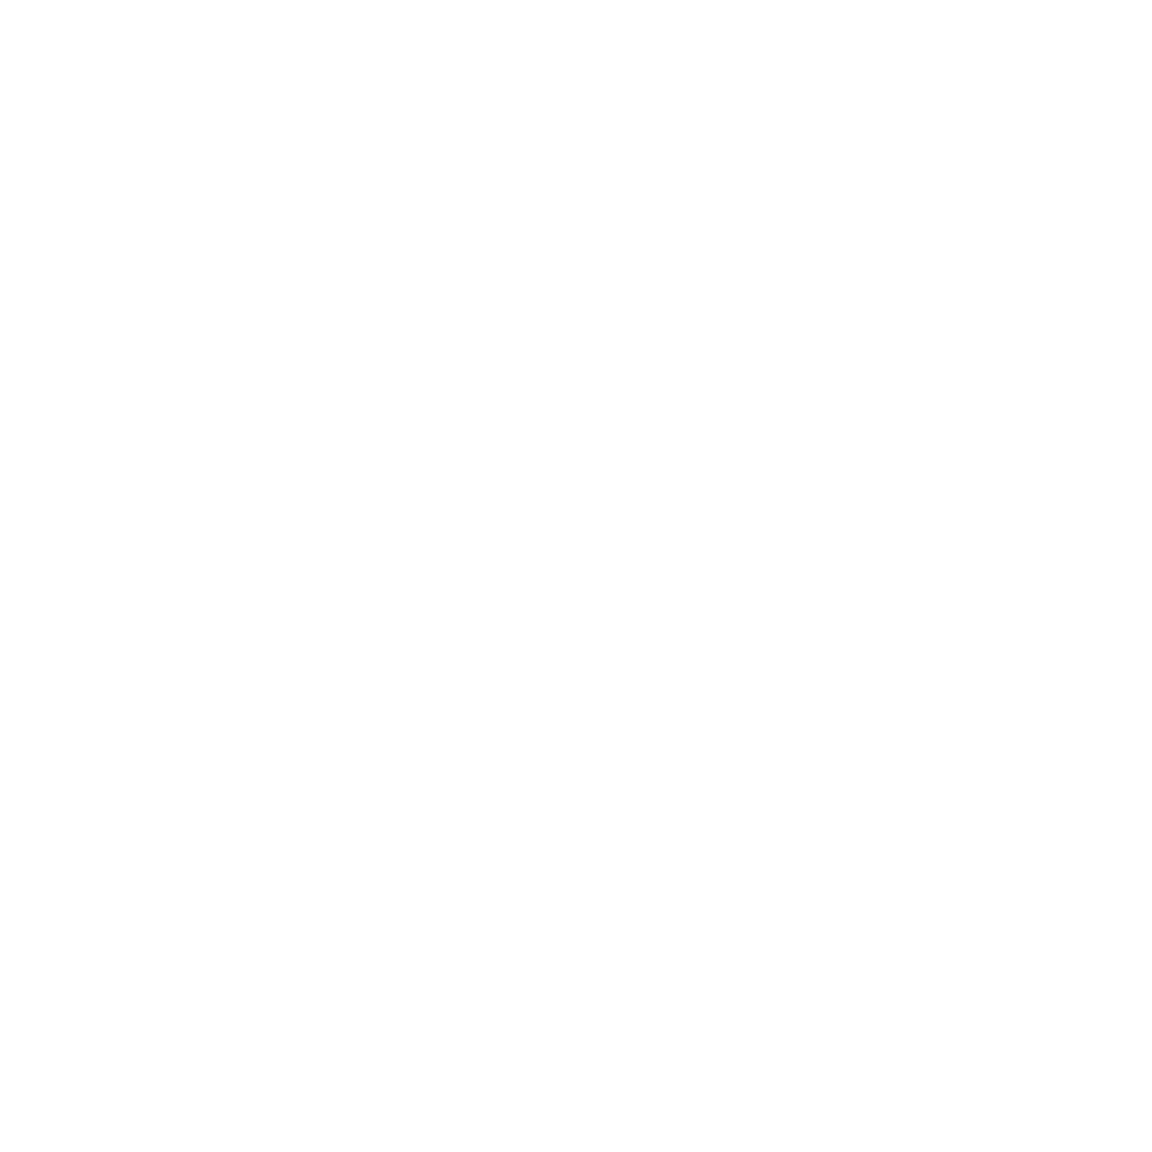

In [7]:
%matplotlib notebook
# The previous line makes the 3D surface plot interactive.
# Change it to %matplotlib inline if you just want a static plot.

# To get 3D axes, we need to pass the subplot_kw argument below
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))

# Create the x and y coordinates
xp = np.arange(-5, 5, 0.01)
yp = np.arange(-5, 5, 0.01)

# Turn those coordinates into grids
X, Y = np.meshgrid(xp, yp)

# Compute the function on that grid
Z = np.sin(Y) * np.sin(0.5*X) * np.exp(0.1*X)

# Plot the surface. The "cmap" argument determines the "colour map"
ax.plot_surface(X, Y, Z, cmap="coolwarm");
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('f(x,y)',fontsize=14);

The plot that this produces is interactive - try clicking and dragging to rotate the surface. We have used the popular "coolwarm" colouring for the surface, but there are many other options for colour maps available - see https://matplotlib.org/stable/tutorials/colors/colormaps.html.

# Contour plots

## Basic contours

We can also visualise 3D surfaces using contour plots.

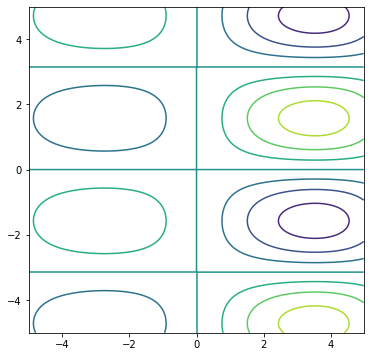

In [8]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))

# Create the x and y coordinates
xp = np.arange(-5, 5, 0.01)
yp = np.arange(-5, 5, 0.01)

# Turn those coordinates into grids
X, Y = np.meshgrid(xp, yp)

# Compute the function on that grid
Z = np.sin(Y) * np.sin(0.5*X) * np.exp(0.1*X)

# Plot the contours
ax.contour(X, Y, Z);

We can customise this plot by (for example) changing the number of contours used and adding a scale (important!)

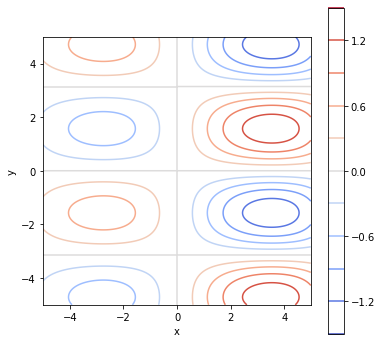

In [9]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))

# force the aspect ratio of the plot to be 1:1
ax.set_aspect(1)

C = ax.contour(X, Y, Z, levels=10, cmap="coolwarm");
fig.colorbar(C)

ax.set_xlabel("x")
ax.set_ylabel("y");

We could alternatively have the contour levels be presented on the contours:

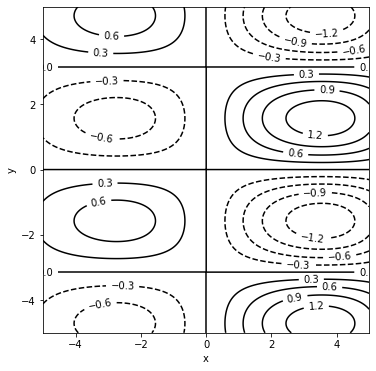

In [10]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect(1)

# "k" for blac"k"
C = ax.contour(X, Y, Z, levels=10, colors="k");
# add labels to the contours
ax.clabel(C)

ax.set_xlabel("x")
ax.set_ylabel("y");

Note that when contours are drawn in black, a dashed line represents a negative value and a solid line a non-negative value.

In the plots above, we have allowed `matplotlib` to choose the contour levels. Specifying `levels=n` will "request" that `matplotlib` chooses no more than $n+1$ contour lines for us. If we explicitly want certain contour levels, we can instead pass a sequence of levels. You can manually write the levels as a list, or use a function like `arange`.

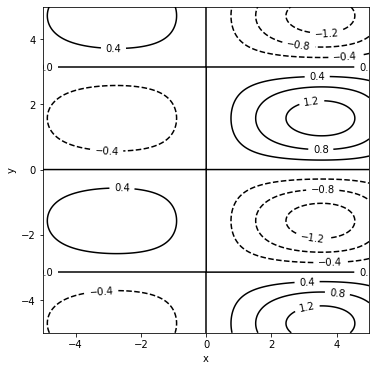

In [11]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect(1)

# Specify the exact contour levels to use.
# These must be in ascending order.
C = ax.contour(X, Y, Z, levels=[-1.2, -0.8, -0.4, 0, 0.4, 0.8, 1.2], colors="k");
# add labels to the contours
ax.clabel(C)

ax.set_xlabel("x")
ax.set_ylabel("y");

## Filled contours

An alternative to using `contour` is `contourf`. This produces "filled" contour plots:

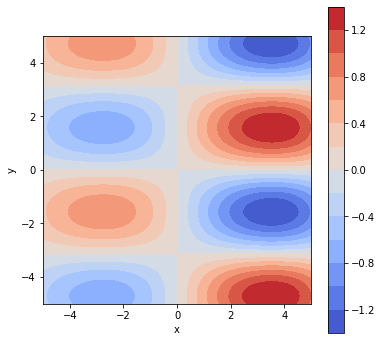

In [12]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect(1)

C = ax.contourf(X, Y, Z, levels=15, cmap="coolwarm");
fig.colorbar(C)

ax.set_xlabel("x")
ax.set_ylabel("y");

We can combine `contourf` and `contour` like so:

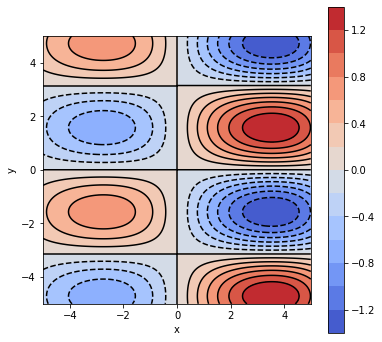

In [13]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect(1)

# draw both a contour and a filled contour plot on ax
ax.contour(X, Y, Z, levels=15, colors="k")
C = ax.contourf(X, Y, Z, levels=15, cmap="coolwarm");
fig.colorbar(C)

ax.set_xlabel("x")
ax.set_ylabel("y");

# Vector fields

There are two main options available for plotting vector fields: `quiver` and `streamplot`. These are easiest to explain by example. We will consider the function 
$$f(x, y) = \begin{pmatrix}x - 0.5y \\ \cos(x) \end{pmatrix}$$
which could represent, for example, an autonomous system of ODEs.

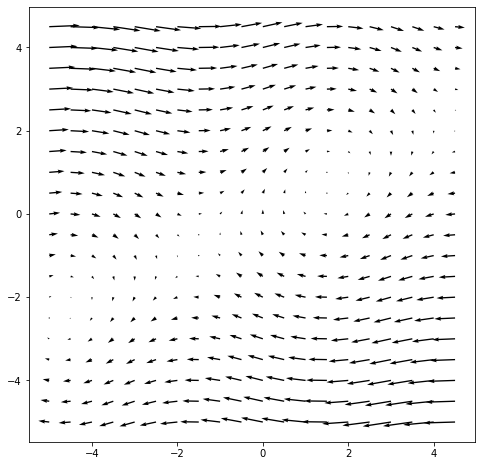

In [14]:
# Define the vector function
def f(x, y):
    return y - 0.5*x, np.cos(x)

# Create the x and y coordinates
xp = np.arange(-5, 5, 0.5)
yp = np.arange(-5, 5, 0.5)

# Turn those coordinates into grids
X, Y = np.meshgrid(xp, yp)

# Compute the vector field.
# Note that U will contain the x-component and V will contain the y-component 
# of f(x, y) at each point.
U, V = f(X, Y)

fig, ax = plt.subplots(figsize=(8, 8))

ax.quiver(X, Y, U, V);

# We have neglected axes, a title, and so on - you can add them in the same
# way as for basic plots.

You can see more examples of quiver plots [here](https://matplotlib.org/stable/gallery/images_contours_and_fields/quiver_simple_demo.html) and [here](https://matplotlib.org/stable/gallery/images_contours_and_fields/quiver_demo.html).

Note that it is quite hard to see what is going on in some areas. A `streamplot` might help:

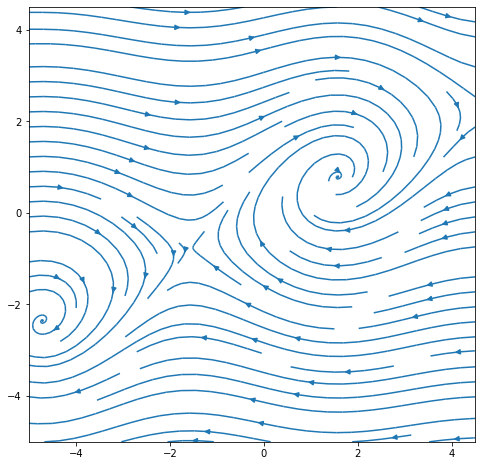

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.streamplot(X, Y, U, V);

# you should add labels!

You can see more examples of stream plots [here](https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html).

# Annotations

We often want to mark points on a plot. The simplest way of doing this is using the `scatter` function (usually used to draw scatter plots). In the example below, we mark the visible stationary points on the stream plot from above. The same technique will work for any of the plots above (though for a 3D plot, you will need to provide 3 coordinates for the annotation).

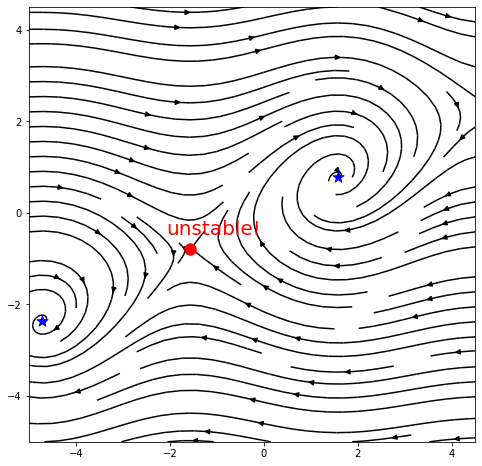

In [16]:
from numpy import pi

def f(x, y):
    return y - 0.5*x, np.cos(x)

xp = np.arange(-5, 5, 0.5)
yp = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(xp, yp)
U, V = f(X, Y)

fig, ax = plt.subplots(figsize=(8, 8))

ax.streamplot(X, Y, U, V, color="k");

# Mark the stable stationary points.
# First, separate them into lists of x-coords and corresponding y-coords.
stable_x = [-3/2 * pi, pi/2]
stable_y = [-3/4 * pi, pi/4]

# Now plot them as blue stars.
# The zorder argument controls the "depth" of the markers, i.e. whether they appear on top of
# or below the stream plot.
ax.scatter(stable_x, stable_y, marker="*", color="b", s=130, zorder=2);

# Now plot the unstable stationary point as a red dot
ax.scatter(-pi/2, -pi/4, marker="o", color="r", s=130, zorder=2)

# We can also add text, though this will look cluttered on the stream plot.
# The first two arguments are the x, y coordinates of where to put the text.
ax.text(-pi/2 - 0.5, -pi/4 + 0.3, "unstable!", fontsize=20, color="r", zorder=2);

Better than adding cluttered text to the stream plot would be to have the markers included in a legend, like so:

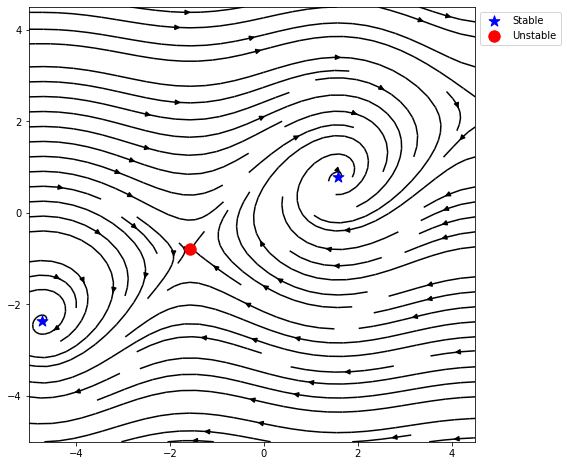

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.streamplot(X, Y, U, V, color="k");

stable_x = [-3/2 * pi, pi/2]
stable_y = [-3/4 * pi, pi/4]

# This time we add a label so that this will appear in the legend.
ax.scatter(stable_x, stable_y, marker="*", color="b", s=130, zorder=2, label="Stable");
ax.scatter(-pi/2, -pi/4, marker="o", color="r", s=130, zorder=2, label="Unstable")

# To place the legend outside of the plot, use "loc" and "bbox_to_anchor" like so:
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

# This still needs a title and axes labels!

# Saving plots

You might want to export a plot, so that you can use it in another application. The easiest way to do this is using `savefig`.

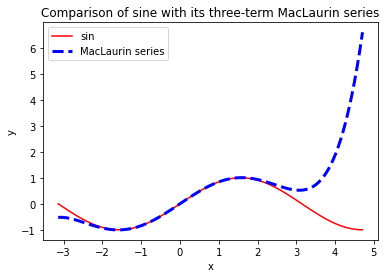

In [18]:
%matplotlib inline

fig, ax = plt.subplots()

ax.plot(x, y, color="red", label="sin")
ax.plot(x, y2, color="b", linestyle='--', linewidth=3, label="MacLaurin series")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.set_title("Comparison of sine with its three-term MacLaurin series");

plt.savefig("images/sin-vs-maclaurin.png")

You should now have a file `sin-vs-maclaurin.png` in the same folder as this notebook.

# Animated plots

If you have a time-dependent plot, it might be fun to animate it. The basic idea is to provide a function which "redraws" the plot for each frame of the animation.

In [19]:
%%capture
# suppress output from this cell

# the two new imports we need
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(8, 8))

xp = np.arange(-5, 5, 0.01)
yp = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(xp, yp)
theta = np.arctan2(X, Y)
R = np.sqrt(X**2 + Y**2)

# animate(i) should draw the i-th frame of the animation
def animate(i):
    # the function Z depends on i, the frame number (think of this as time)
    Z = theta**2 * np.sin(i/20 * R)

    ax.clear()
    # Specify the contour levels. This helps to make the animation smooth.
    ax.contourf(X, Y, Z, levels = list(range(-10, 11, 2)));
    ax.set_xlabel('x',fontsize=14)
    ax.set_ylabel('y',fontsize=14)
    ax.set_title("$\\theta^2 \\sin(\\frac{tR}{50})$, $t = %.2f$"%(i/20),fontsize=14);

anim = animation.FuncAnimation(fig, animate,
                               frames=100, interval=50, blit=False)

In [20]:
# This cell may take a short while

HTML(anim.to_html5_video())    # display the animation

# anim.save('animation.mp4')  # save the animation as mp4